<a href="https://colab.research.google.com/github/antonia-04/Inteligenta-artificiala-UBB-teme/blob/main/AI_laborator_2%2C_ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema 2

Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

* sa se vizualizeze una din imagini
* daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.
* sa se transforme imaginile in format gray-levels si sa se vizualizeze
* sa se blureze o imagine si sa se afiseze in format "before-after"
* sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after

https://www.geeksforgeeks.org/python-pil-image-open-method/

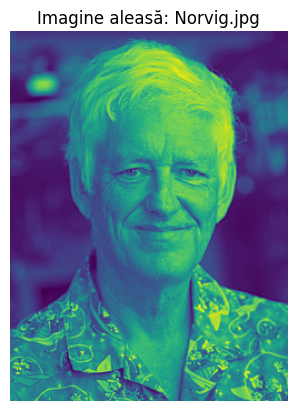

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# sa se vizualizeze una din imagini
imageFolder = "/content/images"

imageFiles = [f for f in os.listdir(imageFolder) if f.lower().endswith(('.png', '.jpg', '.', '.webp'))]

randomImage = random.choice(imageFiles)
imagePath = os.path.join(imageFolder, randomImage)

img = Image.open(imagePath)

plt.imshow(img)
plt.axis('off')
plt.title(f"Imagine aleasă: {randomImage}")
plt.show()


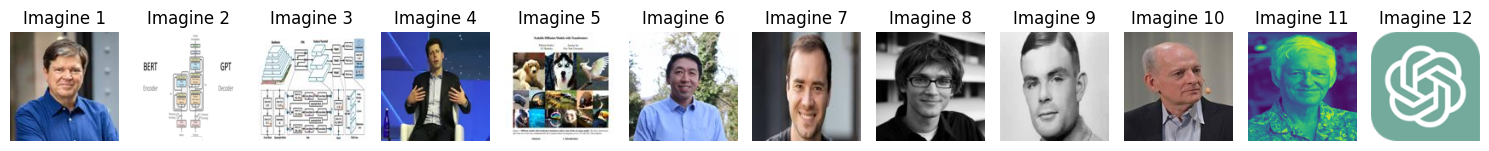

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli
# si sa se vizualizeze imaginile intr-un cadru tabelar.
imageFolder = "/content/images"
outputFolder = "/content/resizedImages"
os.makedirs(outputFolder, exist_ok=True)

# lista cu fisierele de imagini
imageFiles = [f for f in os.listdir(imageFolder) if f.endswith(('.jpg', '.png', '.webp'))]

# dimensiunea primei imagini
firstImage = Image.open(os.path.join(imageFolder, imageFiles[0]))
firstSize = firstImage.size

# verif daca toate imaginile au aceeasi dimensiune
resize = False
for f in imageFiles:
      img = Image.open(os.path.join(imageFolder, f))
      if img.size != firstSize:
        resize = True
        break

# daca trebuie sa le rediemnsionam
if resize:
  for f in imageFiles:
    img = Image.open(os.path.join(imageFolder, f))
    img = img.resize((128, 128))
    img.save(os.path.join(outputFolder, f))

fig, axes = plt.subplots(1, len(imageFiles), figsize=(15, 5))  # 1 rând și câte o coloană pentru fiecare imagine

for i, file in enumerate(imageFiles):
    img_path = os.path.join(outputFolder, file)
    img = Image.open(img_path)

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Imagine {i+1}")

plt.tight_layout()
plt.show()

https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

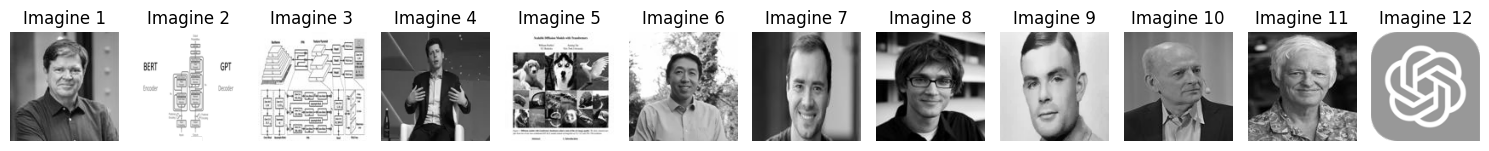

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

from skimage import color
from skimage import io


# sa se transforme imaginile in format gray-levels si sa se vizualizeze
imageFolder = "/content/resizedImages"
imageFiles = [f for f in os.listdir(imageFolder) if f.endswith(('.jpg', '.png', '.webp'))]

# vizualizam in grid
fig, axes = plt.subplots(1, len(imageFiles), figsize=(15, 5))

for i, file in enumerate(imageFiles):
    imgPath = os.path.join(imageFolder, file)
    # deschidem imaginea
    img = Image.open(imgPath)

    # transformam in tonuri de gri
    imgGray = img.convert('LA')

    axes[i].imshow(imgGray, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Imagine {i+1}")
plt.tight_layout()
plt.show()

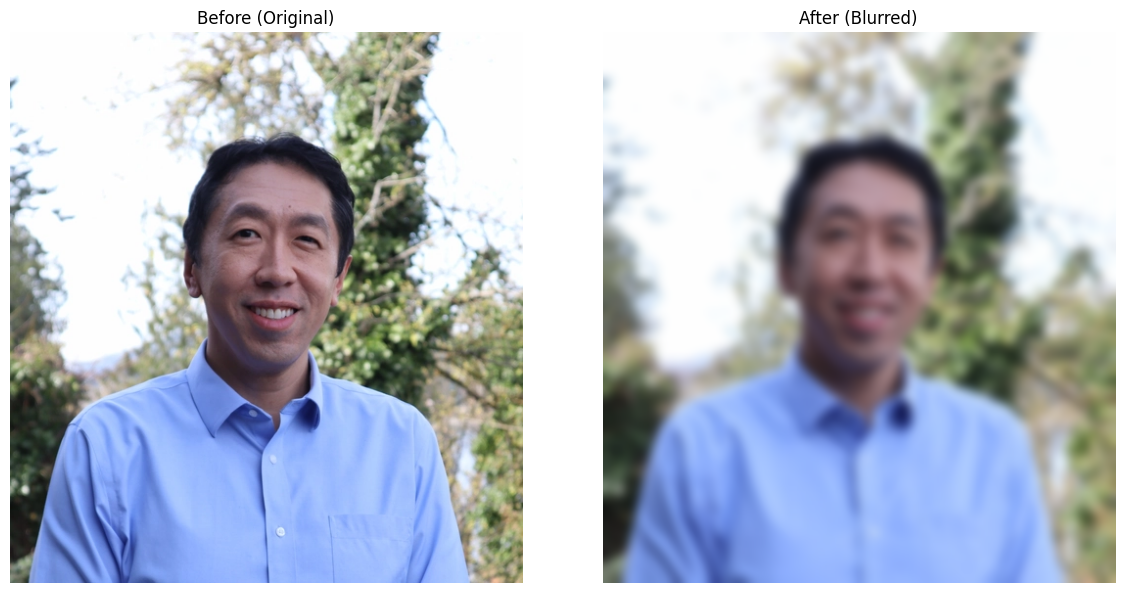

In [ ]:
# sa se blureze o imagine si sa se afiseze in format "before-after"

import os
import random
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

imageFolder = "/content/images"

imageFiles = [f for f in os.listdir(imageFolder) if f.lower().endswith(('.png', '.jpg', '.webp'))]

randomImage = random.choice(imageFiles)
imagePath = os.path.join(imageFolder, randomImage)

img = Image.open(imagePath)

blurredImage = img.filter(ImageFilter.GaussianBlur(radius=5))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# img originala
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title("Before (Original)")

# img blurata
axes[1].imshow(blurredImage)
axes[1].axis('off')
axes[1].set_title("After (Blurred)")

plt.tight_layout()
plt.show()


Algoritmul Canny
https://youtu.be/CGfXCkHNemo?si=aI382a92sXNuvW9K

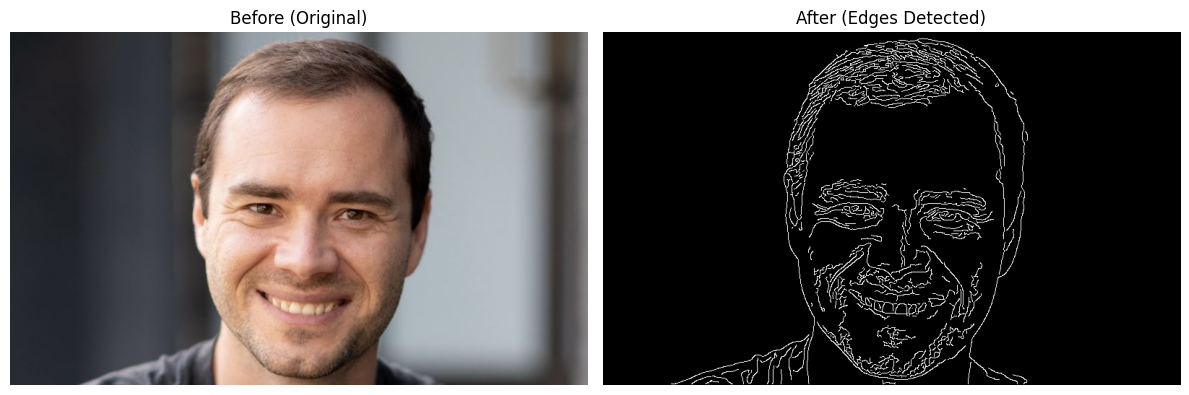

In [ ]:
import os
import random
from PIL import Image
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt

# sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after

imageFolder = "/content/images"

imageFiles = [f for f in os.listdir(imageFolder) if f.lower().endswith(('.png', '.jpg', '.', '.webp'))]

randomImage = random.choice(imageFiles)
imagePath = os.path.join(imageFolder, randomImage)

img = Image.open(imagePath)

imageGray = img.convert('L')
# convertim la numpy array pt a putea folosi skimage
imgArray = np.array(imageGray)
# detectam muchiile -> algoritm Canny
edges = feature.canny(imgArray, sigma=1.0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title("Before (Original)")

axes[1].imshow(edges, cmap='gray')
axes[1].axis('off')
axes[1].set_title("After (Edges Detected)")

plt.tight_layout()
plt.show()

#### Problema 4

Sa se normalizeze informatiile de la problema 1 si 2 folosind diferite metode de normalizare astfel:

* problema 2 - valorile pixelilor din imagini


Pentru a normaliza valorile pixelilor unei imagini, trebuie mai întâi să o convertim într-un array NumPy. Această conversie este esențială deoarece permite aplicarea eficientă a operațiilor matematice necesare normalizării. În primul rând, imaginea este transformată în tonuri de gri pentru a avea un singur canal de intensitate. Apoi, folosind `np.array()`, imaginea este convertită într-un array de tip `float32`, permițând efectuarea calculelor pe fiecare pixel. Odată transformată, asupra imaginii pot fi aplicate diferite tehnici de normalizare, precum:  

- **Min-Max Scaling**, care ajustează valorile pixelilor într-un interval de la 0 la 1 prin formula.
- **Standardizarea (Z-score)**, care transformă distribuția pixelilor într-una cu media 0 și deviația standard 1.
- **Log Scaling**, care aplică transformarea logaritmică pentru a reduce variațiile mari de intensitate.

Aceste metode sunt utile pentru îmbunătățirea contrastului și pentru pregătirea imaginilor în diverse aplicații de procesare și analiză.

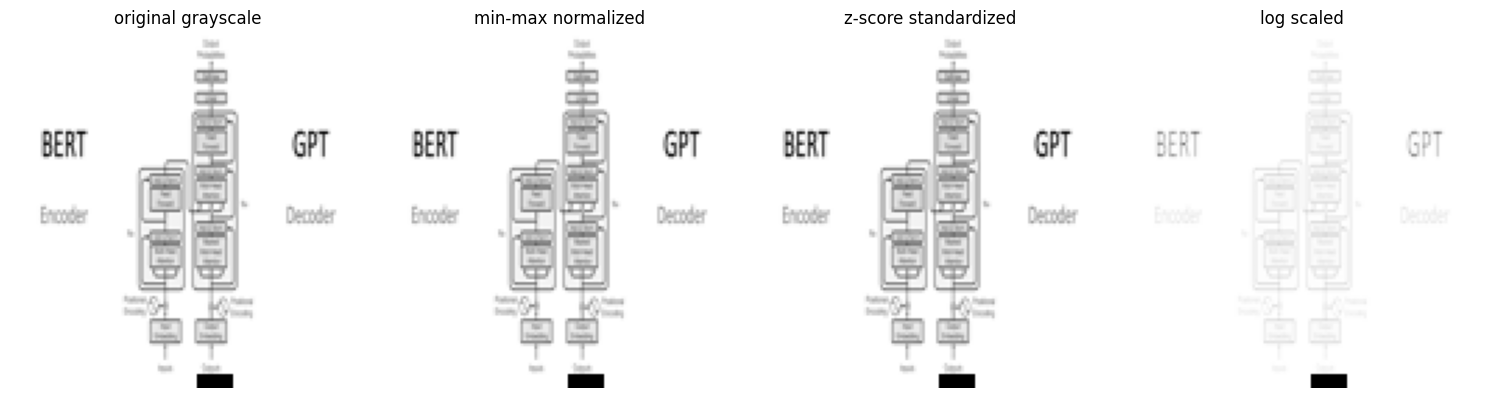

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

imageFolder = "/content/images"

imageFiles = [f for f in os.listdir(imageFolder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))]
randomImage = random.choice(imageFiles)
imagePath = os.path.join(imageFolder, randomImage)

img = Image.open(imagePath)

imgResized = img.resize((128, 128))

# conversie in grayscale
imgGray = imgResized.convert('L')

# convertire in array numpy
imgArray = np.array(imgGray, dtype=np.float32)

# min-max scaling (normalizare in intervalul [0,1])
def minMaxNormalization(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

imgMinMax = minMaxNormalization(imgArray)

# z-score standardization (media = 0, deviatia standard = 1)
def zScoreStandardization(img):
    return (img - np.mean(img)) / np.std(img)

imgZScore = zScoreStandardization(imgArray)

# log scaling (evita valori negative)
def logScaling(img):
    return np.log1p(img)  # log(x + 1) pentru a preveni probleme cu log(0)

imgLog = logScaling(imgArray)

# vizualizarea imaginilor originale si normalizate
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# imagine originala grayscale
axes[0].imshow(imgArray, cmap='gray')
axes[0].set_title("original grayscale")
axes[0].axis('off')

# min-max normalized
axes[1].imshow(imgMinMax, cmap='gray')
axes[1].set_title("min-max normalized")
axes[1].axis('off')

# z-score standardized
axes[2].imshow(imgZScore, cmap='gray')
axes[2].set_title("z-score standardized")
axes[2].axis('off')

# log scaled
axes[3].imshow(imgLog, cmap='gray')
axes[3].set_title("log scaled")
axes[3].axis('off')

plt.tight_layout()
plt.show()
